# Reducción de dimensión

Técnica para reexpresar los datos en menos dimensiones de las que originalmente lo expresan.

In [1]:
import numpy as np
from sklearn.datasets import load_iris
import seaborn as sns
import matplotlib
%matplotlib inline

from matplotlib import pyplot as plt

## Curse of dimensionality

Si $A \in \mathcal{R}^d$ y le quitamos una superficie de ancho $\epsilon$ entonces $vol(A*)$ es

$$
vol(A*) = (1-\epsilon)^d \cdot vol(A)
$$

El volumen de esta nueva esfera

$$
V = \frac {vol(A)-vol(A*)} {vol(A)} = 1 - \frac {vol(A*)} {vol(A)} = 1 - (1-\epsilon)^d
$$

Esta expresión nos dice el volumen que hay entre la esfera de radio 1 y la esfera de radio $(1-\epsilon)$ en $d$ dimensiones.

![volumen de esfera](./curse_of_dimensionality.png)

Esto quiere decir que la intuición en dimensiones bajas no necesariamente aplica en dimensiones altas. 

Nuestros algoritmos igual van a funcionar porque lo que sí podemos hacer es encontrar una variedad de los datos que caputre mejor las relaciones entre ellos.

Es decir, podemos bucar la cantidad efectiva de dimensiones que mejor describan nuestros datos. A esto le llamamos **reducción de la dimensión**.

## Datos 
Recuperamos el conjunto de datos de iris

>The famous Iris database, first used by Sir R.A. Fisher. The dataset is taken
from Fisher's paper. Note that it's the same as in R, but not as in the UCI
Machine Learning Repository, which has two wrong data points.

> This is perhaps the best known database to be found in the
pattern recognition literature.  Fisher's paper is a classic in the field and
is referenced frequently to this day.  (See Duda & Hart, for example.)  The
data set contains 3 classes of 50 instances each, where each class refers to a
type of iris plant.  One class is linearly separable from the other 2; the
latter are NOT linearly separable from each other.

Hasta página de Wikipedia [tiene](https://en.wikipedia.org/wiki/Iris_flower_data_set)

![Versicolor](./versicolor.jpg)


In [2]:
iris = load_iris()
X = iris['data']
y = iris['target']
etiqs = iris.target_names
print(etiqs)
attrb = iris.feature_names
print(attrb)
for x,yt in zip(X,y):
    print("{} : {}".format(x,yt))

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[5.1 3.5 1.4 0.2] : 0
[4.9 3.  1.4 0.2] : 0
[4.7 3.2 1.3 0.2] : 0
[4.6 3.1 1.5 0.2] : 0
[5.  3.6 1.4 0.2] : 0
[5.4 3.9 1.7 0.4] : 0
[4.6 3.4 1.4 0.3] : 0
[5.  3.4 1.5 0.2] : 0
[4.4 2.9 1.4 0.2] : 0
[4.9 3.1 1.5 0.1] : 0
[5.4 3.7 1.5 0.2] : 0
[4.8 3.4 1.6 0.2] : 0
[4.8 3.  1.4 0.1] : 0
[4.3 3.  1.1 0.1] : 0
[5.8 4.  1.2 0.2] : 0
[5.7 4.4 1.5 0.4] : 0
[5.4 3.9 1.3 0.4] : 0
[5.1 3.5 1.4 0.3] : 0
[5.7 3.8 1.7 0.3] : 0
[5.1 3.8 1.5 0.3] : 0
[5.4 3.4 1.7 0.2] : 0
[5.1 3.7 1.5 0.4] : 0
[4.6 3.6 1.  0.2] : 0
[5.1 3.3 1.7 0.5] : 0
[4.8 3.4 1.9 0.2] : 0
[5.  3.  1.6 0.2] : 0
[5.  3.4 1.6 0.4] : 0
[5.2 3.5 1.5 0.2] : 0
[5.2 3.4 1.4 0.2] : 0
[4.7 3.2 1.6 0.2] : 0
[4.8 3.1 1.6 0.2] : 0
[5.4 3.4 1.5 0.4] : 0
[5.2 4.1 1.5 0.1] : 0
[5.5 4.2 1.4 0.2] : 0
[4.9 3.1 1.5 0.2] : 0
[5.  3.2 1.2 0.2] : 0
[5.5 3.5 1.3 0.2] : 0
[4.9 3.6 1.4 0.1] : 0
[4.4 3.  1.3 0.2] : 0
[5.1 3.4 1.5 0.2] : 0
[

¿Cómo empezamos a analizar este dataset?

La primer opción es un _scatter plot_

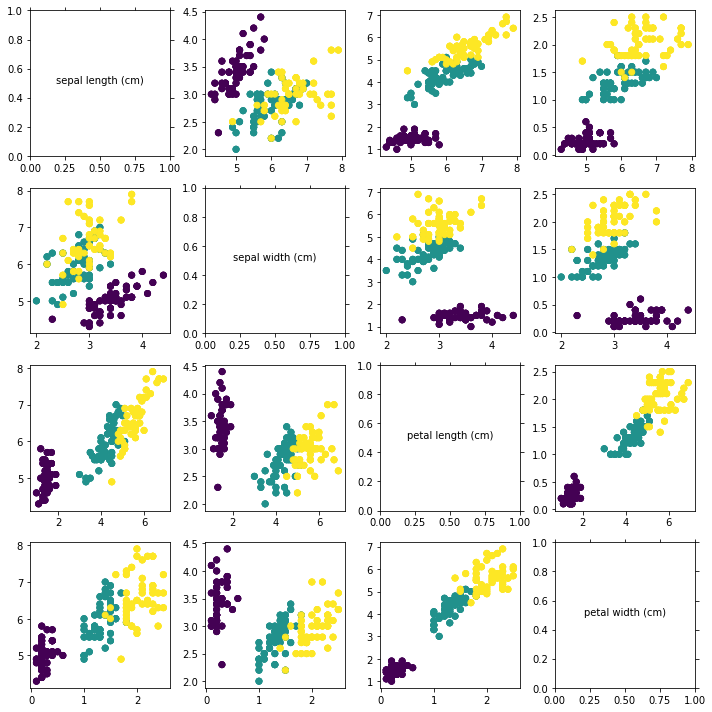

In [3]:
fig, axes = plt.subplots(4,4, figsize=(10,10))
for i in range(axes.shape[0]):
    for j in range(axes.shape[1]):
        ax = axes[i,j]
        if (i==j):
            ax.tick_params(
                axis='both',which='both',
                bottom='off',top='off',
                labelbottom='off',
                left='off',right='off',
                labelleft='off'
            )
            ax.text(0.5,0.5,attrb[i],horizontalalignment='center')
        else:
            ax.scatter(X[:,i],X[:,j],c=y)
            ax.scatter(X[:,i],X[:,j],c=y)
            ax.scatter(X[:,i],X[:,j],c=y)
fig.tight_layout()
plt.show()

En un ejercicio previo decidimos quedarnos con las primeras dos



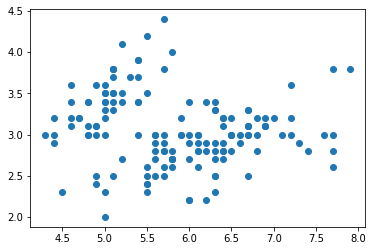

In [4]:
Xr = X[:,:2]
plt.scatter(Xr[:,0],Xr[:,1])

Bien pudieron ser otras dos


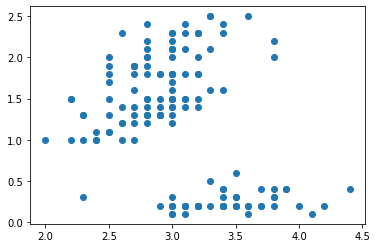

In [5]:
plt.scatter(X[:,1],X[:,3])

### ¿Para qué querríamos menos dimensiones?

1. Precisión
1. Menos información (más manejable)
1. Reducción de ruido




## Metodología

1. Listamos los atributos
1. Elegimos (con criterio) algún subconjunto de ellos
1. Aplicamos algoritmo 

## Listado de métodos.

1. Backward elimination / forward construction
1. Low variance / High correlation
1. PCA
1. Random Forest
1. Isomap
1. SOM


# PCA

Consideren estos datos


In [6]:
D = np.array([[ 10. , 10.7],
               [ 10.4,  9.8],
               [  9.7, 10. ],
               [ 11.7, 11.5],
               [ 11. , 10.8],
               [  8.7,  8.8],
               [  9.5,  9.3],
               [ 10.1,  9.4],
               [ 10.1,  9.4],
               [  9.6,  9.6],
               [ 10.5, 10.4],
               [  9.2,  9. ],
               [ 11.3, 11.6],
               [ 10.1,  9.8],
               [  8.5,  9.2]])

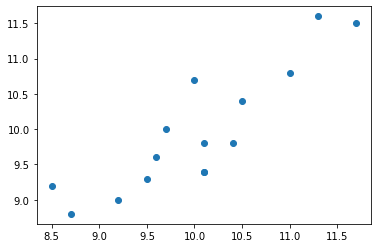

In [7]:
plt.scatter(D[:,0], D[:,1])

¿En cuantas dimensiones podemos expresar estos datos?

Claramente no pasa de 2, ¿pero cómo serían esas dos nuevas dimensiones? Tal vez algo como en la imagen 

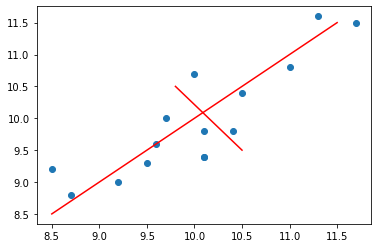

In [8]:
plt.scatter(D[:,0], D[:,1])
x1, y1 = [8.5, 11.5], [8.5, 11.5]
x2, y2 = [10.5,9.5], [9.8, 10.5]
plt.plot(x1,y1,color='r')
plt.plot(y2,x2,color='r')


Lo primero que necesitaríamos saber es qué relación guardan los datos entre ellos

$$
Cov(X,Y) = E[XY] - E[X]E[Y]
$$

In [9]:
Dc = D - D.mean(axis=0)
S = np.cov(Dc, rowvar=False)
print(S)

[[0.79209524 0.67847619]
 [0.67847619 0.75695238]]


Esta matriz la podemos ver como una transformación lineal. Para ver esto vamos "aplicarla" a un punto verde $(1.5, 1.5)$. 

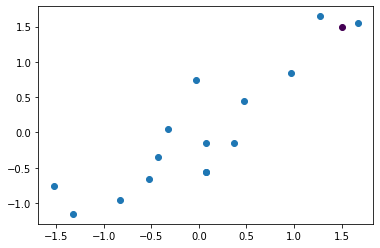

In [11]:
plt.clf()
plt.scatter(Dc[:,0], Dc[:,1])
p1 = [1.5,1.5]
plt.scatter(p1[0], p1[1], c=np.linalg.norm(p1))
 

Después de un par de iteraciones en las que aplicamos la matriz $\Sigma$, esos puntos se ven así

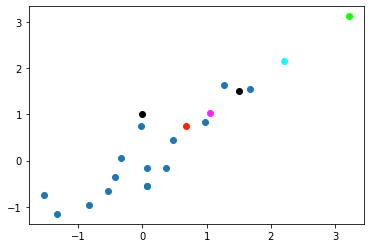

In [54]:
plt.clf()
plt.scatter(Dc[:,0], Dc[:,1])
plt.scatter(p1[0], p1[1], c='#000')

p2 = S.dot(p1)
p3 = S.dot(p2)

plt.scatter(p2[0], p2[1], c='#1FF')
plt.scatter(p3[0], p3[1], c='#1F0')

p4 = [0,1]
p5 = S.dot(p4)
p6 = S.dot(p5)

plt.scatter(p4[0], p4[1], c='#000')
plt.scatter(p5[0], p5[1], c='#F20')
plt.scatter(p6[0], p6[1], c='#F2F')

¿Entonces cómo entender la dinámica inducida por los puntos (reflejada en la matriz $\Sigma$)?

Para ver esto podemos preguntarnos por todos los vectores $v$ que cumplan con

$$
\Sigma v = I v
$$

Para conocer esos vectores entonces hacemos

$$
| \Sigma - \lambda I | = 0
$$

In [55]:
Dvl, Dvc = np.linalg.eig(S)
print(Dvl)
print(Dvc)

[1.4532275  0.09582012]
[[ 0.71620168 -0.69789337]
 [ 0.69789337  0.71620168]]


¿Cómo se ven estos vectores?

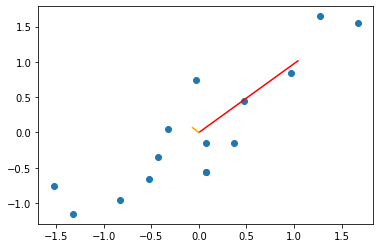

In [59]:
v1, v2 = Dvc[:,0], Dvc[:,1]

plt.clf()
plt.scatter(Dc[:,0], Dc[:,1])
plt.plot([0,Dvl[0]*v1[0]], [0, Dvl[0]*v1[1]], c='r')
plt.plot([0,Dvl[1]*v2[0]], [0, Dvl[1]*v2[1]], c='orange')


Ahora sólo resta encontrar las proyecciones de los datos en estos nuevos ejes. 

$$
V \cdot D
$$

donde 
$$
V = \lbrace v1, v2 \rbrace
$$

In [27]:
p1

[1.5, 1.5]

In [28]:
p2

array([2.20585714, 2.15314286])

In [29]:
p3

array([3.2081051 , 3.12644816])

Algoritmo



In [30]:
from numpy.linalg import eigh, eig
from numpy        import cov, dot
from numpy        import argsort
def pca(datos, dimensiones=2):
    m,n = datos.shape
    D = datos[:]; D-= datos.mean(axis=0)
    R = cov(D, rowvar=False)
    evals, evecs = eig(R)
    idx = argsort(evals)[::-1]
    evecs = evecs[:,idx]
    evals = evals[idx]
    evecs = evecs[:, :dimensiones]
    return dot(evecs.T, D.T).T, evals, evecs

In [31]:
Xpca, varianza, base = pca(X)
print(Xpca)

[[-2.68412563 -0.31939725]
 [-2.71414169  0.17700123]
 [-2.88899057  0.14494943]
 [-2.74534286  0.31829898]
 [-2.72871654 -0.32675451]
 [-2.28085963 -0.74133045]
 [-2.82053775  0.08946138]
 [-2.62614497 -0.16338496]
 [-2.88638273  0.57831175]
 [-2.6727558   0.11377425]
 [-2.50694709 -0.6450689 ]
 [-2.61275523 -0.01472994]
 [-2.78610927  0.235112  ]
 [-3.22380374  0.51139459]
 [-2.64475039 -1.17876464]
 [-2.38603903 -1.33806233]
 [-2.62352788 -0.81067951]
 [-2.64829671 -0.31184914]
 [-2.19982032 -0.87283904]
 [-2.5879864  -0.51356031]
 [-2.31025622 -0.39134594]
 [-2.54370523 -0.43299606]
 [-3.21593942 -0.13346807]
 [-2.30273318 -0.09870885]
 [-2.35575405  0.03728186]
 [-2.50666891  0.14601688]
 [-2.46882007 -0.13095149]
 [-2.56231991 -0.36771886]
 [-2.63953472 -0.31203998]
 [-2.63198939  0.19696122]
 [-2.58739848  0.20431849]
 [-2.4099325  -0.41092426]
 [-2.64886233 -0.81336382]
 [-2.59873675 -1.09314576]
 [-2.63692688  0.12132235]
 [-2.86624165 -0.06936447]
 [-2.62523805 -0.59937002]
 

In [32]:
print(varianza)

[4.22824171 0.24267075 0.0782095  0.02383509]


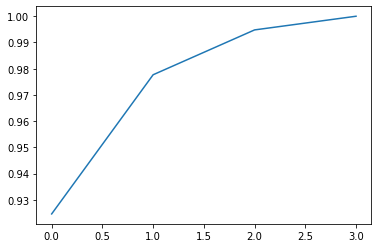

In [33]:
cumvar = np.array([x/sum(varianza) for x in varianza]).cumsum()
plt.clf()
plt.plot(cumvar)

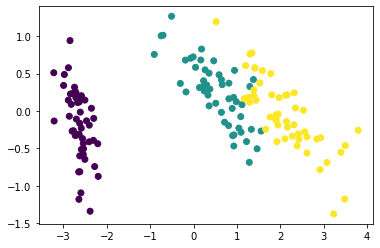

In [34]:
plt.scatter(Xpca[:,0], Xpca[:,1], c=y)

Para poner la legenda con scatter ver [acá](https://matplotlib.org/3.3.2/gallery/lines_bars_and_markers/scatter_with_legend.html)

In [35]:
from sklearn.datasets import load_boston
boston = load_boston()

In [36]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [42]:
data_boston = boston.data
targ_boston = boston.target
print(targ_boston)

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 3

In [38]:
boston_pca, boston_vals, boston_vecs = pca(data_boston)

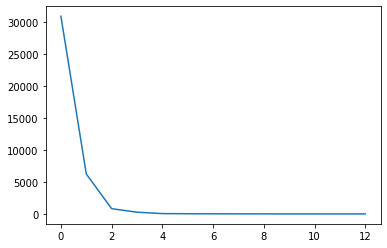

In [39]:
plt.plot(boston_vals)

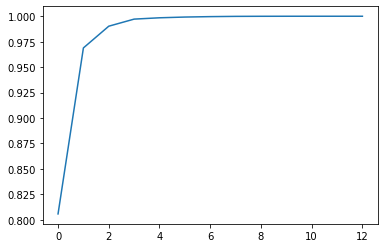

In [41]:
cumvar = np.array([x/sum(boston_vals) for x in boston_vals]).cumsum()
plt.clf()
plt.plot(cumvar)

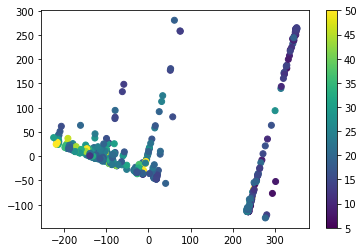

In [45]:
plt.scatter(boston_pca[:,0], boston_pca[:,1], c=targ_boston)
plt.colorbar()

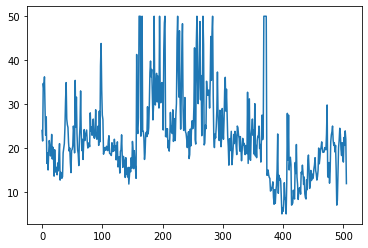

In [44]:
plt.plot(targ_boston)

In [46]:
from sklearn.datasets import load_digits
digits = load_digits()

In [48]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [49]:
etiqs = digits.target
digits_data = digits.data

In [50]:
etiqs

array([0, 1, 2, ..., 8, 9, 8])

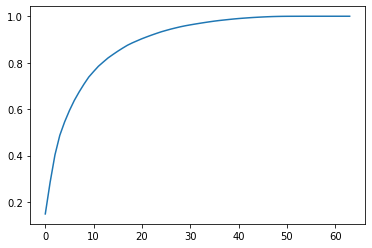

In [52]:
digs_pca, digs_vals, digs_vecs = pca(digits_data)
cumvar = np.array([x/sum(digs_vals) for x in digs_vals]).cumsum()
plt.clf()
plt.plot(cumvar)

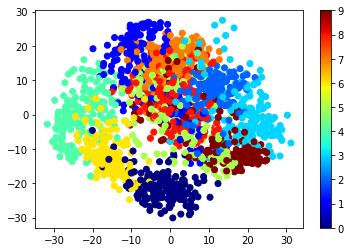

In [56]:
plt.scatter(digs_pca[:,0], digs_pca[:,1], c=etiqs, cmap='jet')
plt.colorbar()